In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
Data= yf.download('MSFT',start= '2023-01-01', end= '2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.036011,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,226.667282,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,219.949371,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,222.541534,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,224.708313,27369800
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400


In [5]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,313.701720,316.770681,310.811919,313.951001,312.156067,2.767556e+07
std,41.055768,40.987979,40.872155,40.975858,41.443251,1.064023e+07
min,223.000000,225.759995,219.350006,222.309998,219.949371,1.017660e+07
25%,283.304993,285.207512,281.520012,282.994987,280.691269,2.118648e+07
50%,324.869995,328.865005,321.589996,324.650009,322.882782,2.505275e+07
75%,337.284988,340.889992,334.682503,337.897499,335.996910,2.996060e+07
max,383.760010,384.299988,378.160004,382.700012,381.993622,7.847820e+07


In [6]:
colum_to_normalize=['Open','High','Low','Close','Adj Close','Volume' ]  
x=Data[colum_to_normalize].values.astype(float)
x
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
Data[colum_to_normalize]=x_scaled
Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,0.124907,0.126088,0.113658,0.107675,0.105444,0.227863
2023-01-04,0.057726,0.044847,0.041622,0.042334,0.041457,0.592179
2023-01-05,0.026126,0.011291,0.015175,0.000000,0.000000,0.430576
2023-01-06,0.000000,0.000000,0.000000,0.016335,0.015997,0.489549
2023-01-09,0.021461,0.034565,0.044456,0.029989,0.029368,0.251725
...,...,...,...,...,...,...
2023-12-22,0.937298,0.942475,0.965682,0.949373,0.949983,0.101235
2023-12-26,0.945509,0.953576,0.970657,0.949872,0.950475,0.036551
2023-12-27,0.937360,0.941718,0.966312,0.946194,0.946841,0.069234


In [7]:
Data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,0.124907,0.126088,0.113658,0.107675,0.105444,0.227863
2023-01-04,0.057726,0.044847,0.041622,0.042334,0.041457,0.592179
2023-01-05,0.026126,0.011291,0.015175,0.000000,0.000000,0.430576
2023-01-06,0.000000,0.000000,0.000000,0.016335,0.015997,0.489549
2023-01-09,0.021461,0.034565,0.044456,0.029989,0.029368,0.251725
2023-01-10,0.029609,0.035007,0.050249,0.040776,0.039931,0.246807
2023-01-11,0.051568,0.064274,0.074051,0.083920,0.082182,0.270751
2023-01-12,0.076263,0.089189,0.089478,0.101004,0.098911,0.250256
2023-01-13,0.087086,0.085846,0.098042,0.105493,0.103307,0.163345


In [8]:
Data=Data.fillna(Data.mean())

In [9]:
#training and testing

a=Data

In [10]:
b=Data['High']

In [11]:
len(a.columns)

6

In [12]:
a.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
feature_list=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [14]:
len(feature_list)

6

In [15]:
a=Data[feature_list]
a.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,0.124907,0.126088,0.113658,0.107675,0.105444,0.227863
2023-01-04,0.057726,0.044847,0.041622,0.042334,0.041457,0.592179
2023-01-05,0.026126,0.011291,0.015175,0.000000,0.000000,0.430576
2023-01-06,0.000000,0.000000,0.000000,0.016335,0.015997,0.489549
2023-01-09,0.021461,0.034565,0.044456,0.029989,0.029368,0.251725


In [16]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3,random_state =42)

In [17]:
print(a_train)
print(a_test)
print(b_train)
print(b_test)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2023-05-02  0.527246  0.526176  0.532460  0.518112   0.512048  0.237590
2023-02-14  0.308970  0.310395  0.314401  0.310867   0.304427  0.393421
2023-07-06  0.710998  0.739435  0.731377  0.741692   0.736110  0.263312
2023-04-27  0.453906  0.501072  0.477930  0.514496   0.508498  0.531261
2023-05-08  0.541988  0.532610  0.546187  0.538313   0.531880  0.163129
...              ...       ...       ...       ...        ...       ...
2023-06-06  0.698743  0.691371  0.710409  0.694370   0.689551  0.149625
2023-01-24  0.121299  0.114734  0.132800  0.123013   0.120464  0.440075
2023-05-16  0.540122  0.554750  0.569737  0.557578   0.550794  0.242362
2023-09-20  0.662540  0.654914  0.636988  0.613879   0.614523  0.164856
2023-05-31  0.679833  0.694967  0.679932  0.661388   0.657101  0.523765

[175 rows x 6 columns]
                Open      High       Low

In [18]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
a_train=stc.fit_transform(a_train)
a_test=stc.transform(a_test)

In [19]:
#for evaluating

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train,b_train)
b_pred_regr = regr.predict(a_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE = ', mse(b_pred_regr, b_test))
print('MAE = ',mae(b_pred_regr, b_test))
print ('R2 Score =' , r2_score(b_pred_regr,b_test))

MSE =  0.0021359694083553705
MAE =  0.038919449953566054
R2 Score = 0.9636269406483349


In [20]:
# Initialize and train Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(a_train, b_train)

# Make predictions on the test set
b_pred_gbr = gb_model.predict(a_test)

print('MSE = ', mse(b_pred_gbr, b_test))
print('MAE = ',mae(b_pred_gbr, b_test))
print ('R2 Score =' , r2_score(b_pred_gbr,b_test))

MSE =  5.2587220977422046e-05
MAE =  0.004511267176932447
R2 Score = 0.9992009981340225


In [21]:
# Initialize and train XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(a_train, b_train)

# Make predictions on the test set
b_pred_xg = xgb_model.predict(a_test)

print('MSE = ', mse(b_pred_xg, b_test))
print('MAE = ',mae(b_pred_xg, b_test))
print ('R2 Score =' , r2_score(b_pred_xg,b_test))

MSE =  0.00010022519764424167
MAE =  0.0064961953603730055
R2 Score = 0.998511358267775


In [22]:
# Initialize and train KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Use 5 nearest neighbors
knn_model.fit(a_train, b_train)

# Make predictions on the test set
b_pred_kn = knn_model.predict(a_test)
print('MSE = ', mse(b_pred_kn, b_test))
print('MAE = ',mae(b_pred_kn, b_test))
print ('R2 Score =' , r2_score(b_pred_kn,b_test))

MSE =  0.0005523379559149114
MAE =  0.014123874025829321
R2 Score = 0.9910972169163563


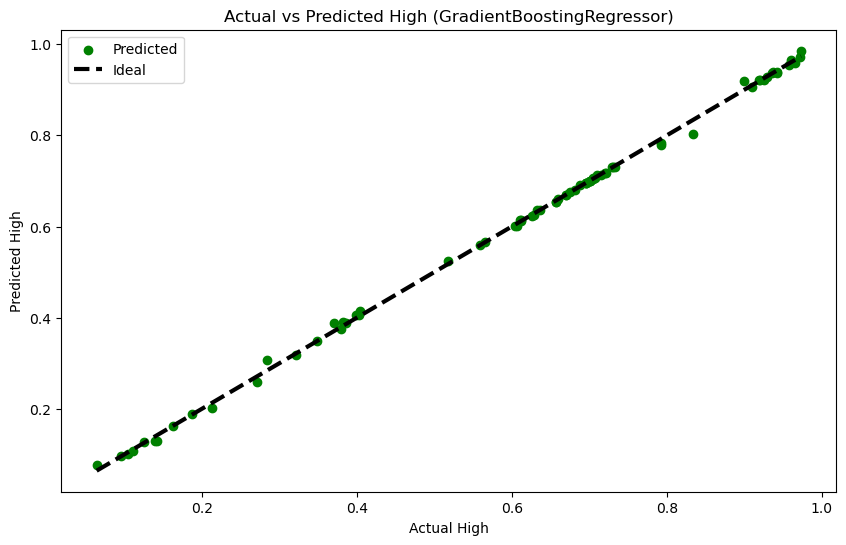

In [24]:
# Plotting actual vs predicted for GradientBoostingRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_gbr, color='green', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (GradientBoostingRegressor)')
plt.legend() 
plt.show()

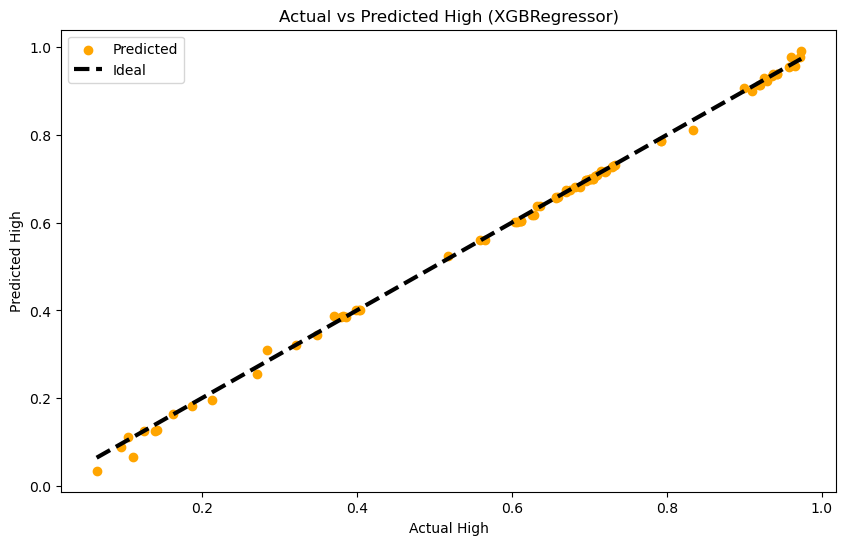

In [25]:
# Plotting actual vs predicted for XGBRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_xg, color='orange', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (XGBRegressor)')
plt.legend() 
plt.show()

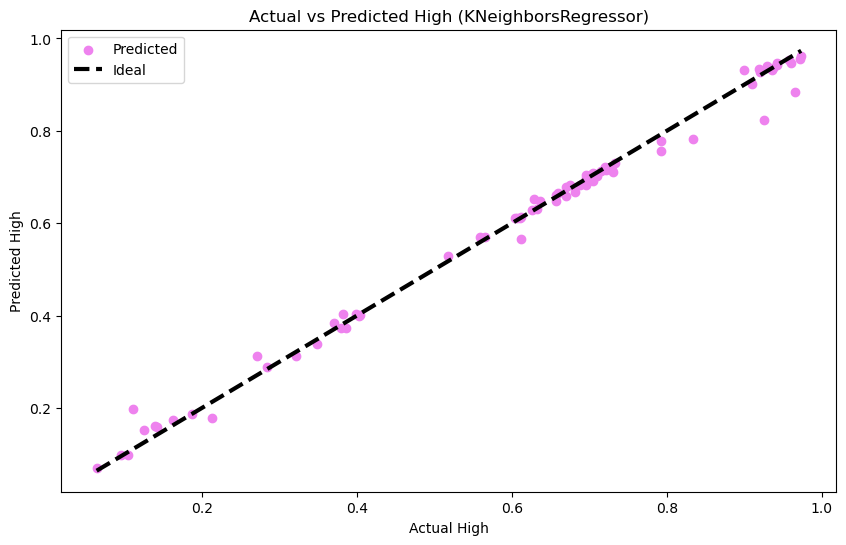

In [26]:
# Plotting actual vs predicted for KNeighborsRegressor
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_kn, color='violet', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (KNeighborsRegressor)')
plt.legend() 
plt.show()

In [41]:
from catboost import CatBoostRegressor
# Assuming a_train, b_train, a_test, and b_test are your training and test data

# Instantiate CatBoostRegressor model
catboost_reg = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=2, loss_function='RMSE')

# Fit the model to the training data
catboost_reg.fit(a_train, b_train, verbose=0)  

# Make predictions on the test data
b_pred_catboost_reg = catboost_reg.predict(a_test)

print('MSE = ', mse(b_pred_catboost_reg, b_test))
print('MAE = ',mae(b_pred_catboost_reg, b_test))
print ('R2 Score =' , r2_score(b_pred_catboost_reg,b_test))

MSE =  0.00016871953122132058
MAE =  0.009751864888218352
R2 Score = 0.9974471314098768


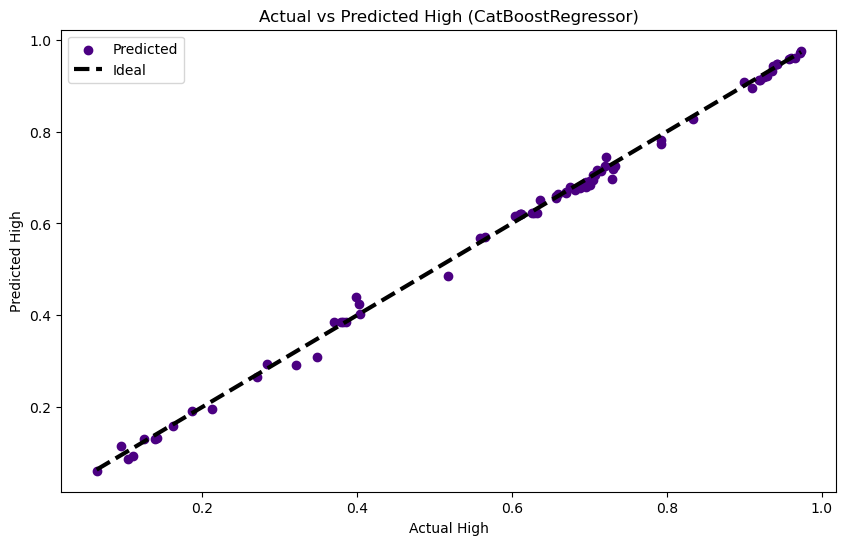

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(b_test, b_pred_catboost_reg, color='indigo', label='Predicted')
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=3, label='Ideal')
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs Predicted High (CatBoostRegressor)')
plt.legend() 
plt.show()